In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
dataset = pd.read_csv('../data/recipe_site_traffic.csv')
df = dataset.copy()

In [95]:
df.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic'],
      dtype='object')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


# Data Cleaning and Analysis

## Numerical Columns

In [97]:
numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein']

In [98]:
(df[numerical_columns] < 0).value_counts()

calories  carbohydrate  sugar  protein
False     False         False  False      947
Name: count, dtype: int64

*All numerical data is >= 0, as they logically should be* 

In [99]:
df[numerical_columns].describe()

,calories,carbohydrate,sugar,protein
count,895.000000,895.000000,895.000000,895.000000
mean,435.939196,35.069676,9.046547,24.149296
std,453.020997,43.949032,14.679176,36.369739
min,0.140000,0.030000,0.010000,0.000000
25%,110.430000,8.375000,1.690000,3.195000
50%,288.550000,21.480000,4.550000,10.800000
75%,597.650000,44.965000,9.800000,30.200000
max,3633.160000,530.420000,148.750000,363.360000


### Non Imputed Numerical Columns Analysis

In [100]:
numerical_columns_non_imputed = df[numerical_columns].copy()

In [101]:
missing_numerical = numerical_columns_non_imputed.isna().sum()
print(f"Number of missing numerical values: \n{missing_numerical} \n\nor in % \n\n{missing_numerical / numerical_columns_non_imputed.shape[0] * 100}")

Number of missing numerical values: 
calories        52
carbohydrate    52
sugar           52
protein         52
dtype: int64 

or in % 

calories        5.491024
carbohydrate    5.491024
sugar           5.491024
protein         5.491024
dtype: float64


*As these columns have more than 5% missing values (missing values are on the same rows), which means that data imputation is a better choice than deleting data. To decide how to impute data, these columns have to be analysed first.*

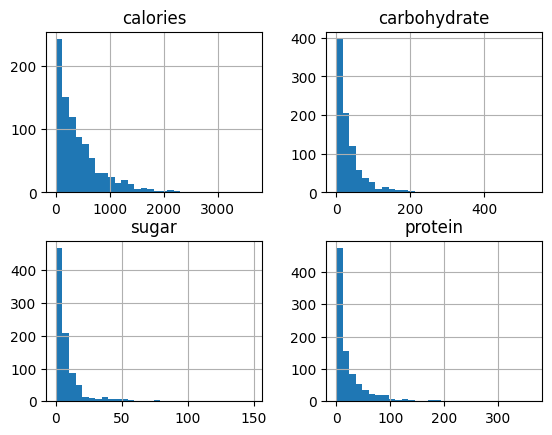

In [102]:
numerical_columns_non_imputed.hist(bins=30)
plt.show()

In [103]:
numerical_columns_non_imputed.skew()

calories        2.036151
carbohydrate    3.756980
sugar           4.223352
protein         3.509453
dtype: float64

*All columns are right-skewed, which means that median imputaion can be used for imputing missing values as well as deminiting effect of the existing outliers. Also KNN imputation is possible. But a simple median imputation should be sufficient in this case.*

### Imputation of Numerical Columns

In [104]:
numerical_columns_imputed = df[numerical_columns].copy()

In [105]:
numerical_columns_imputed.mode()

,calories,carbohydrate,sugar,protein
0,34.97,3.46,1.51,0.36
1,47.89,5.14,1.62,NaN
2,128.30,6.40,NaN,NaN
3,529.26,7.73,NaN,NaN
4,NaN,9.58,NaN,NaN


In [106]:
# First mode value is taken, as there are multiple modes in some columns 
for column in numerical_columns:
    numerical_columns_imputed[column].fillna(numerical_columns_imputed[column].mode()[0], inplace=True)

C:\Users\sasha\AppData\Local\Temp\ipykernel_11524\2082792425.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numerical_columns_imputed[column].fillna(numerical_columns_imputed[column].mode()[0], inplace=True)


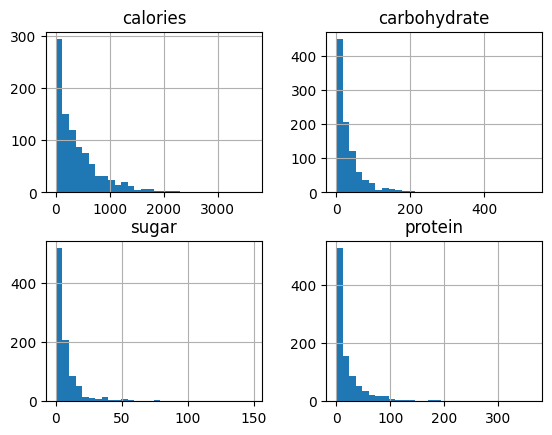

In [107]:
numerical_columns_imputed.hist(bins=30)
plt.show()

In [108]:
numerical_columns_imputed.skew()

calories        2.074178
carbohydrate    3.804175
sugar           4.329816
protein         3.579566
dtype: float64

In [109]:
numerical_columns_imputed.describe()

,calories,carbohydrate,sugar,protein
count,947.00000,947.000000,947.000000,947.000000
mean,413.92188,33.333981,8.632714,22.843020
std,449.77696,43.327268,14.373047,35.769376
min,0.14000,0.030000,0.010000,0.000000
25%,88.21500,6.770000,1.510000,2.290000
50%,264.13000,19.440000,4.140000,9.640000
75%,576.22500,42.590000,9.285000,28.530000
max,3633.16000,530.420000,148.750000,363.360000


*Distributions visibly do not change, which implies that imputation is successful and result from describe function is not that different before and after imputation*

In [110]:
categorical = ['category', 'servings', 'high_traffic']
categorical_columns = df[categorical]

## Categorical Columns

### 'category' Column

In [111]:
categorical_columns['category'].value_counts()

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64

In [112]:
categorical_columns['category'].replace({'Chicken Breast': 'Chicken'}, inplace=True)

C:\Users\sasha\AppData\Local\Temp\ipykernel_11524\3365554179.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categorical_columns['category'].replace({'Chicken Breast': 'Chicken'}, inplace=True)
C:\Users\sasha\AppData\Local\Temp\ipykernel_11524\3365554179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns['category'].re

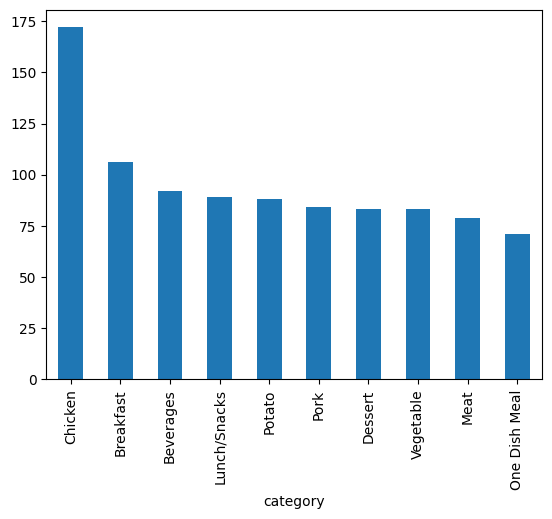

In [113]:
categorical_columns['category'].value_counts().plot(kind='bar')
plt.show()

*The values are reasonably well-distributed across the categories, except for the chicken category, which dominates amongst other categories. As there is no null values and data is clean, there is no need to clean this column further* 

### 'servings' Column

In [114]:
categorical_columns['servings'].value_counts()

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64

*There is a need to replace few values with corresponding category, as they are clearly inconsistent with number of serving. Also datatype of the column can be changed, as according to the dataset description it should be numerical, eventhough it is better to treat it as a categorical column.*

In [115]:
categorical_columns['servings'].replace({'4 as a snack': '4', '6 as a snack': '6'}, inplace=True)

categorical_columns['servings'] = categorical_columns['servings'].astype('int')

C:\Users\sasha\AppData\Local\Temp\ipykernel_11524\3050503049.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categorical_columns['servings'].replace({'4 as a snack': '4', '6 as a snack': '6'}, inplace=True)
C:\Users\sasha\AppData\Local\Temp\ipykernel_11524\3050503049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns['

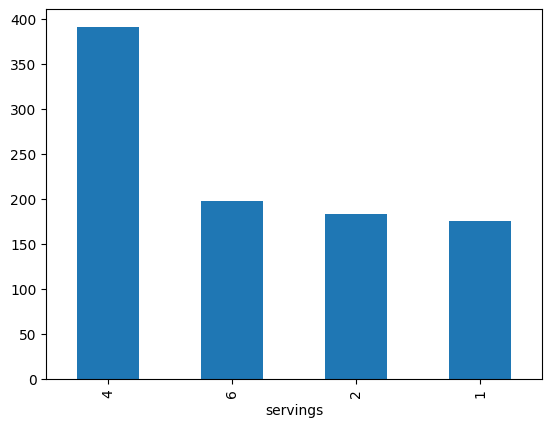

In [116]:
categorical_columns['servings'].value_counts().plot(kind='bar')
plt.show()

*Column has a significant dominance of category '4 servings', while other categories are simingly balanced. As this is not a target value in the analysis there is no need to balance data here, but there is a need to encode data, especially with label encoding as it makes sense for this column (1 << 2 << 4 << 6).*

### 'high_traffic' Column

In [117]:
categorical_columns['high_traffic'].value_counts()

high_traffic
High    574
Name: count, dtype: int64

In [118]:
print(f'Not labeled high_trafic values number: {categorical_columns['high_traffic'].isna().sum()}')

Not labeled high_trafic values number: 373


*From the description of the dataset we can assume that in case of those recipies traffic was not high, thus no labeling for those rows. Null values can be replaced with 'Not High' category for easier targeting later, as this is a target value of the dataset.*

In [119]:
categorical_columns['high_traffic'].replace({None: 'Not High'}, inplace = True)

C:\Users\sasha\AppData\Local\Temp\ipykernel_11524\3619046263.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categorical_columns['high_traffic'].replace({None: 'Not High'}, inplace = True)
C:\Users\sasha\AppData\Local\Temp\ipykernel_11524\3619046263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns['high_traffic'].rep

*Now data is ready for the model building and training*

In [120]:
clear_df = numerical_columns_imputed.join(categorical_columns)

## Additional Visualisation

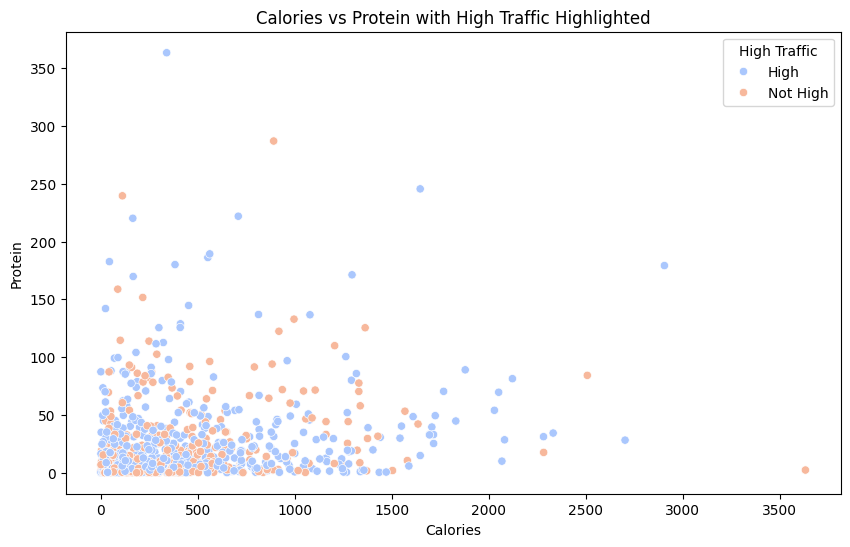

In [121]:
# Scatterplot for calories vs protein colored by high_traffic
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clear_df, x='calories', y='protein', hue='high_traffic', palette='coolwarm')
plt.title('Calories vs Protein with High Traffic Highlighted')
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.legend(title='High Traffic')
plt.show()

C:\Users\sasha\AppData\Local\Temp\ipykernel_11524\3111424911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clear_df, x='high_traffic', y='calories', palette='Set2')


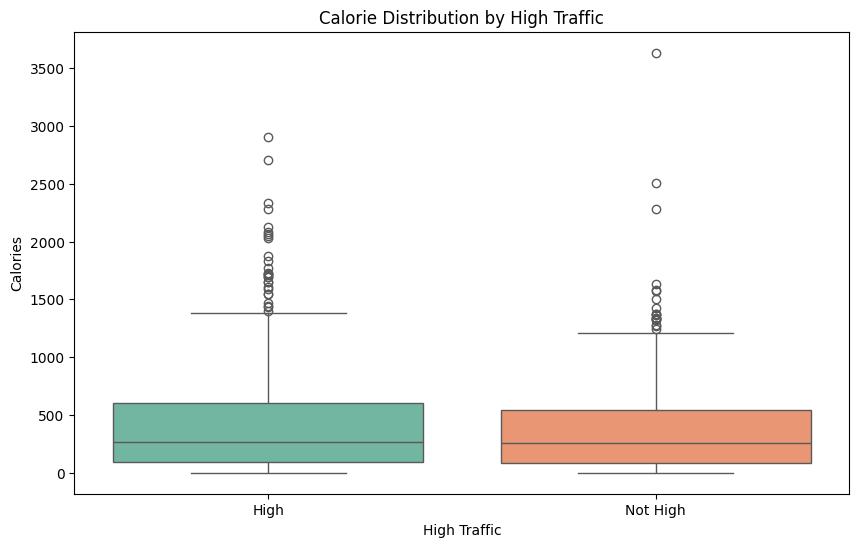

In [122]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=clear_df, x='high_traffic', y='calories', palette='Set2')
plt.title('Calorie Distribution by High Traffic')
plt.xlabel('High Traffic')
plt.ylabel('Calories')
plt.show()

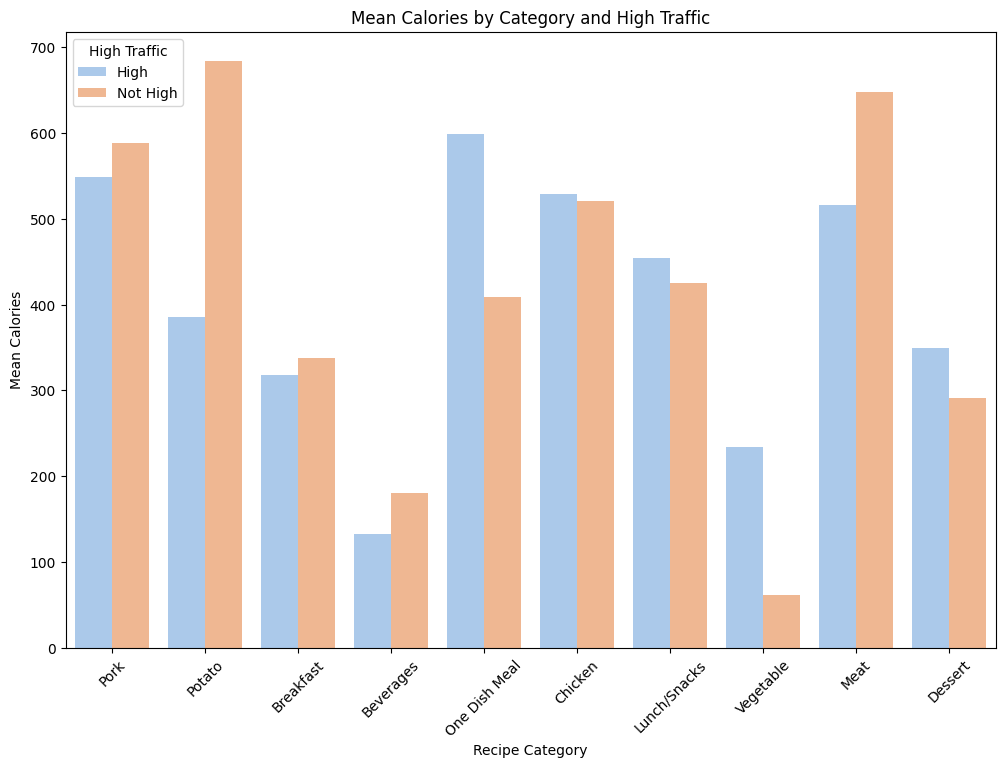

In [123]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=clear_df, 
    x='category', 
    y='calories', 
    hue='high_traffic', 
    estimator='mean', 
    errorbar=None, 
    palette='pastel'
)
plt.title('Mean Calories by Category and High Traffic')
plt.xlabel('Recipe Category')
plt.ylabel('Mean Calories')
plt.xticks(rotation=45)
plt.legend(title='High Traffic')
plt.show()

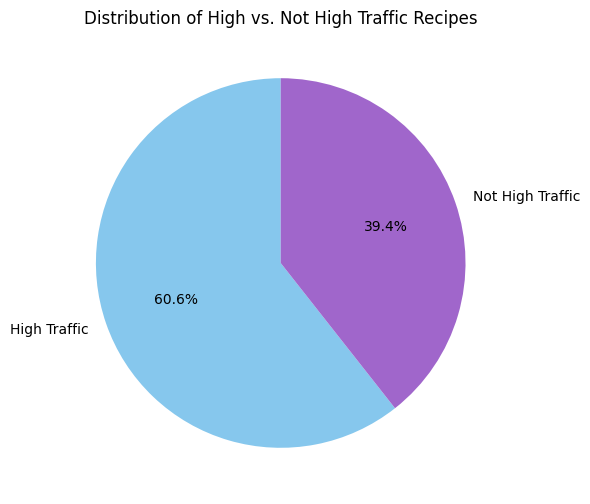

In [124]:
traffic_counts = clear_df['high_traffic'].value_counts()

labels = ['High Traffic', 'Not High Traffic']

plt.figure(figsize=(8, 6))
plt.pie(traffic_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#86c7ed', '#a066cb'])
plt.title('Distribution of High vs. Not High Traffic Recipes')
plt.show()

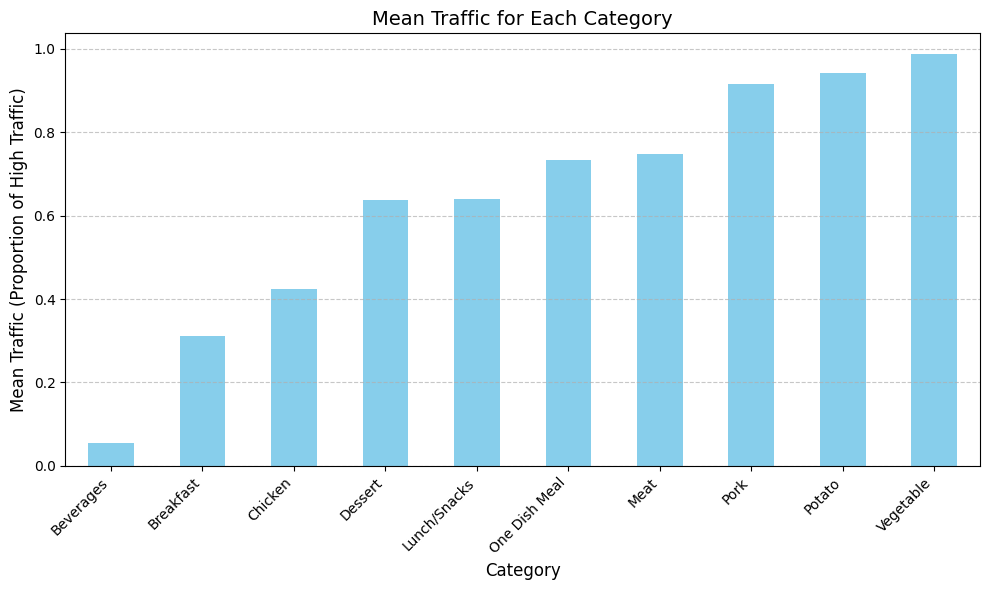

In [125]:
clear_df['high_traffic'] = clear_df['high_traffic'].map({'High': 1, 'Not High': 0})
mean_traffic_by_category = clear_df.groupby('category')['high_traffic'].mean()

plt.figure(figsize=(10, 6))
mean_traffic_by_category.sort_values().plot(kind='bar', color='skyblue')
plt.title('Mean Traffic for Each Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Mean Traffic (Proportion of High Traffic)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

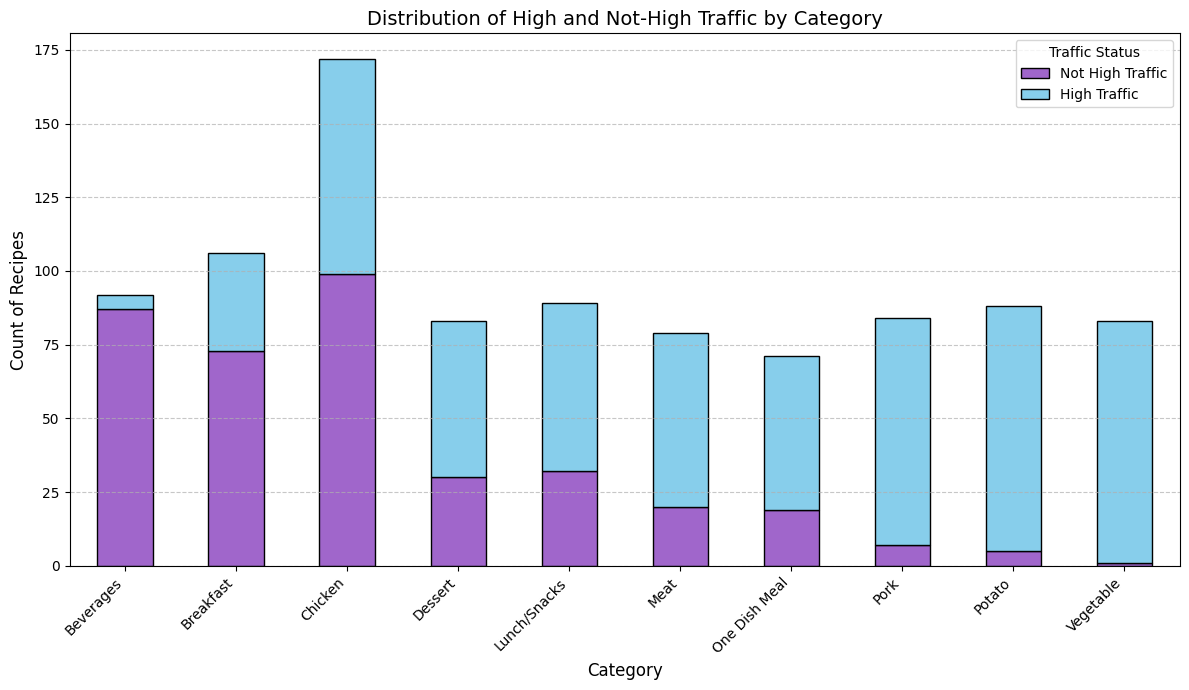

In [126]:
category_traffic_counts = clear_df.groupby(['category', 'high_traffic']).size().unstack()

category_traffic_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    color=['#a066cb', 'skyblue'],
    edgecolor='black'
)

plt.title('Distribution of High and Not-High Traffic by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count of Recipes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(['Not High Traffic', 'High Traffic'], title='Traffic Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

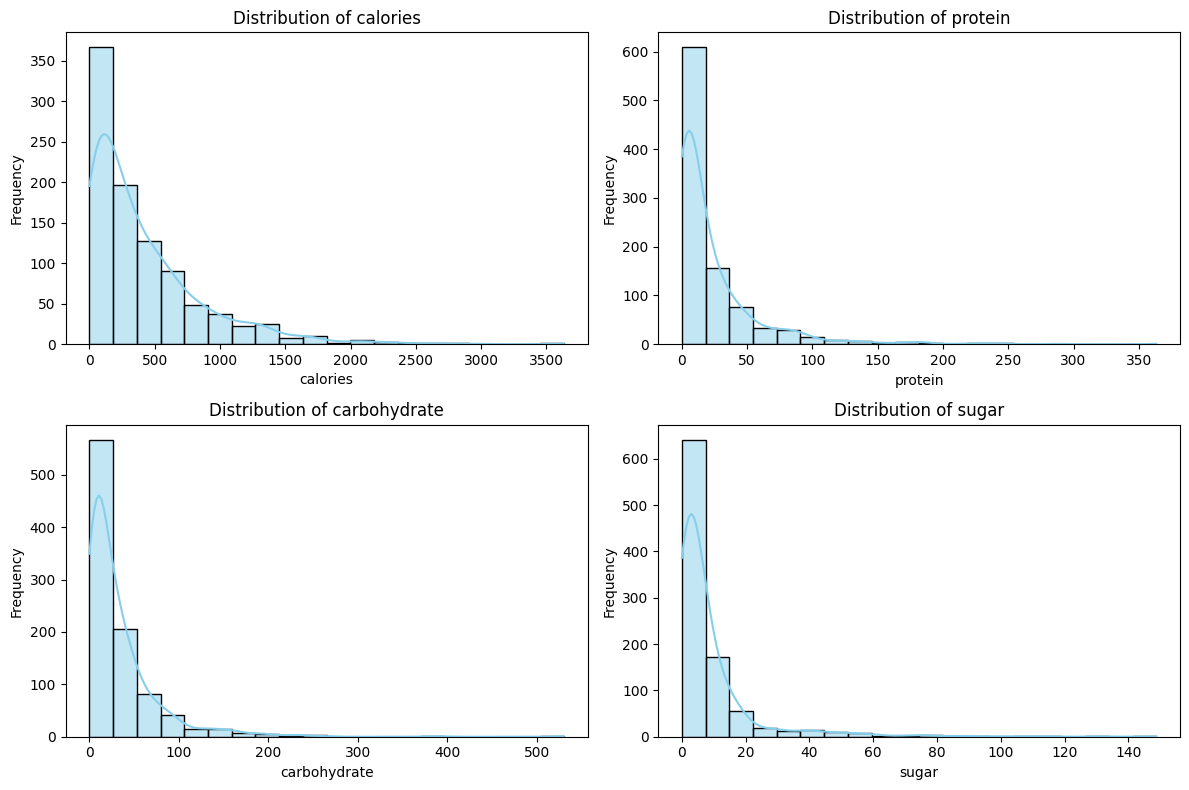

In [127]:
numerical_features = ['calories', 'protein', 'carbohydrate', 'sugar']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(clear_df[feature], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

# Model Building and Training 

## Features

In [128]:
data = clear_df

In [129]:
data.head(5)

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,34.97,3.46,1.51,0.36,Pork,6,1
1,35.48,38.56,0.66,0.92,Potato,4,1
2,914.28,42.68,3.09,2.88,Breakfast,1,0
3,97.03,30.56,38.63,0.02,Beverages,4,1
4,27.05,1.85,0.80,0.53,Beverages,4,0


### Feature Engeneering

Numerical features are to be normilized while categorical encoded. For right-skewed numerical value logarifmic transformation will be applied to reduce skewness and then scaled with MinMaxScaler 

In [130]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [131]:
scaler = MinMaxScaler()

data[numerical_columns] = np.log1p(data[numerical_columns])
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

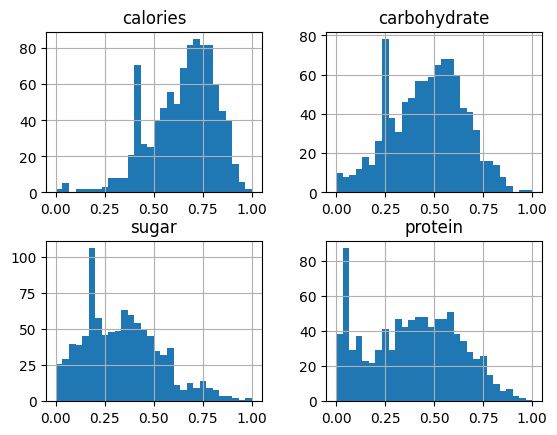

In [132]:
data[numerical_columns].hist(bins=30)
plt.show()

*Some features can be made up, combined, etc. For example, proportions between different nutrients can be calculated, total nutrients; some features can be mapped to other features in hopes to give more insights for the model;*

In [133]:
data_servings = pd.get_dummies(data['servings'], prefix='portion(s)')
data_categories = pd.get_dummies(data['category'], prefix='category')

# data['high_traffic'] = data['high_traffic'].map({'High': 1, 'Not High': 0})

In [134]:
data['total_nutrients'] = data['calories'] + data['protein'] + data['carbohydrate'] + data['sugar']

In [135]:
category_traffic_mean = data.groupby('category')['high_traffic'].mean()
data['category_traffic'] = data['category'].map(category_traffic_mean)

In [136]:
category_nutrition = data.groupby('category')[['calories', 'protein', 'carbohydrate']].mean().sum(axis=1)
data['category_nutrition'] = data['category'].map(category_nutrition)

In [137]:
category_rank = data.groupby('category')['high_traffic'].mean().rank(ascending=False)
data['category_rank'] = data['category'].map(category_rank)

In [138]:
data = data.join(data_servings)
data = data.join(data_categories)
data.drop('servings', axis=1, inplace=True)
data.drop('category', axis=1, inplace=True)

### Feature Importance

In [139]:
data.columns

Index(['calories', 'carbohydrate', 'sugar', 'protein', 'high_traffic',
       'total_nutrients', 'category_traffic', 'category_nutrition',
       'category_rank', 'portion(s)_1', 'portion(s)_2', 'portion(s)_4',
       'portion(s)_6', 'category_Beverages', 'category_Breakfast',
       'category_Chicken', 'category_Dessert', 'category_Lunch/Snacks',
       'category_Meat', 'category_One Dish Meal', 'category_Pork',
       'category_Potato', 'category_Vegetable'],
      dtype='object')

In [140]:
data.head(5)

,calories,carbohydrate,sugar,protein,high_traffic,total_nutrients,category_traffic,category_nutrition,category_rank,portion(s)_1,...,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
0,0.427868,0.234645,0.182102,0.052132,1,0.896748,0.916667,1.596341,3.0,False,...,False,False,False,False,False,False,False,True,False,False
1,0.429613,0.584096,0.099393,0.110598,1,1.223701,0.943182,1.504401,2.0,False,...,False,False,False,False,False,False,False,False,True,False
2,0.829071,0.599958,0.279774,0.229875,0,1.938677,0.311321,1.560110,9.0,True,...,False,True,False,False,False,False,False,False,False,False
3,0.552149,0.547924,0.734072,0.003357,1,1.837502,0.054348,1.003913,10.0,False,...,True,False,False,False,False,False,False,False,False,False
4,0.397040,0.162946,0.115590,0.072102,0,0.747678,0.054348,1.003913,10.0,False,...,True,False,False,False,False,False,False,False,False,False


In [141]:
corr = data.corr()
corr['high_traffic'].sort_values(ascending=False)

high_traffic              1.000000
category_traffic          0.579748
category_Vegetable        0.242208
category_Potato           0.220794
category_Pork             0.198287
category_nutrition        0.187076
protein                   0.097147
category_Meat             0.086880
category_One Dish Meal    0.073573
portion(s)_6              0.047764
total_nutrients           0.041913
carbohydrate              0.035126
calories                  0.034618
category_Lunch/Snacks     0.022626
category_Dessert          0.020571
portion(s)_4              0.000023
portion(s)_1             -0.017104
portion(s)_2             -0.032408
sugar                    -0.084127
category_Chicken         -0.175195
category_Breakfast       -0.214204
category_Beverages       -0.370437
category_rank            -0.559504
Name: high_traffic, dtype: float64

*The correlation analysis with the target variable high_traffic reveals that certain features, particularly recipe categories, have notable relationships with traffic levels. Positive correlations are observed with categories like Vegetable (0.242), Potato (0.221), and Pork (0.198), indicating these are more likely to be associated with high traffic. In contrast, categories such as Beverages (-0.370) and Breakfast (-0.214) show negative correlations, suggesting they are less likely to attract high traffic. Nutritional features, including protein (0.097) and calories (0.034), exhibit weak correlations, implying they are less influential as predictors. Overall, traffic behavior appears to be strongly category-dependent, with specific recipe types driving higher interest. Weakly correlated features may require further exploration for compound effects, while strongly correlated features like Vegetable and Potato can serve as key predictors in traffic categorization models.*

## Model

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [143]:
data.columns

Index(['calories', 'carbohydrate', 'sugar', 'protein', 'high_traffic',
       'total_nutrients', 'category_traffic', 'category_nutrition',
       'category_rank', 'portion(s)_1', 'portion(s)_2', 'portion(s)_4',
       'portion(s)_6', 'category_Beverages', 'category_Breakfast',
       'category_Chicken', 'category_Dessert', 'category_Lunch/Snacks',
       'category_Meat', 'category_One Dish Meal', 'category_Pork',
       'category_Potato', 'category_Vegetable'],
      dtype='object')

In [144]:
X = data.drop(['high_traffic'], axis=1)
y = data['high_traffic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression model

In [145]:
model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [146]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Model accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.70      0.68      0.69        77
           1       0.78      0.81      0.79       113

    accuracy                           0.75       190
   macro avg       0.74      0.74      0.74       190
weighted avg       0.75      0.75      0.75       190

Model accuracy: 0.7526315789473684


In [147]:
coefficients = model.coef_[0]
feature_names = X_train.columns
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

calories: -0.3140420615999488
carbohydrate: 0.20006015869971783
sugar: -0.10136180081186766
protein: 0.2578202483263411
total_nutrients: 0.04247654461424979
category_traffic: 0.2351174799744375
category_nutrition: 0.09453392626666307
category_rank: -0.566560761212626
portion(s)_1: 0.11701985643510063
portion(s)_2: -0.13873224798510675
portion(s)_4: -0.1521820816473058
portion(s)_6: 0.17359097148894678
category_Beverages: -0.647733535813536
category_Breakfast: 0.40428474089536964
category_Chicken: 0.2504306581611566
category_Dessert: 0.5823158315676115
category_Lunch/Snacks: 0.05578446546432599
category_Meat: -0.816465575421087
category_One Dish Meal: -0.29551043237088437
category_Pork: 0.10186425558844817
category_Potato: -0.06905534363098521
category_Vegetable: 0.4337814338512096


In [148]:
logistic_cm = confusion_matrix(y_test, y_pred)
print("Logistic Regression Confusion Matrix:")
print(logistic_cm)

Logistic Regression Confusion Matrix:
[[52 25]
 [22 91]]


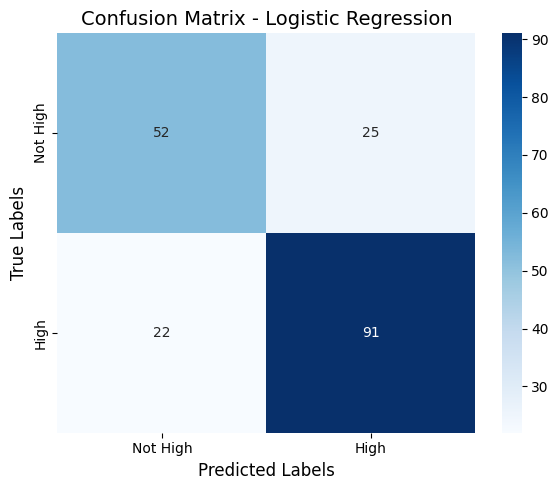

In [149]:
plt.figure(figsize=(6, 5))
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not High', 'High'], yticklabels=['Not High', 'High'])

plt.title('Confusion Matrix - Logistic Regression', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

plt.tight_layout()
plt.show()

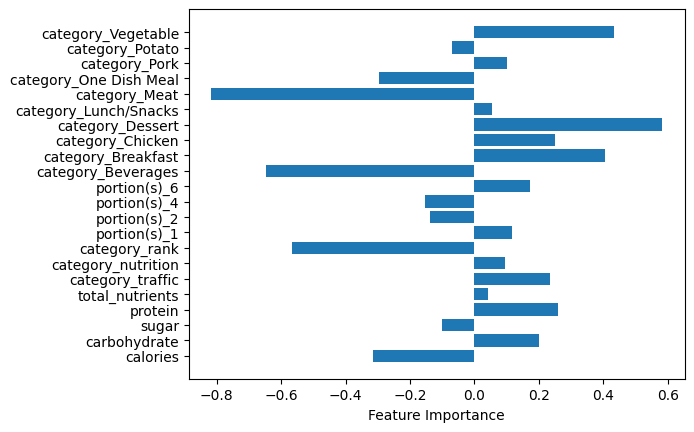

In [150]:
plt.barh(X.columns, coefficients)
plt.xlabel("Feature Importance")
plt.show()

***The feature importance of the logistic model provides valuable insights into recipe popularity. Nutritional factors reveal mixed effects, with calories (-0.31) and sugar (-0.10) negatively impacting traffic, while carbohydrate (0.20) and protein (0.26) contribute positively. Total nutrients (0.04) show minimal influence. Among categorical variables, Desserts (0.58) and Vegetables (0.43) strongly correlate with higher traffic, followed by Breakfast (0.40) and Chicken (0.25). In contrast, Meat (-0.82), Beverages (-0.65), and One Dish Meals (-0.30) show significant negative effects. Portion sizes also exhibit varying impacts, with portions of 6 (0.17) being slightly favored, while portions of 4 (-0.15) and 2 (-0.14) negatively influence traffic. Overall, model suggests a preference for lighter, protein-rich recipes in popular categories, while high-calorie and meat-heavy recipes may attract less interest.***

### Random Forest Classifier

In [151]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

In [152]:
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.7490589055420006


In [153]:
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.57      0.62        77
           1       0.74      0.82      0.78       113

    accuracy                           0.72       190
   macro avg       0.71      0.70      0.70       190
weighted avg       0.72      0.72      0.72       190

Test Accuracy: 0.7210526315789474


In [154]:
rf_cm = confusion_matrix(y_test, y_pred)
print("Random Forest Confusion Matrix:")
print(rf_cm)

Random Forest Confusion Matrix:
[[44 33]
 [20 93]]


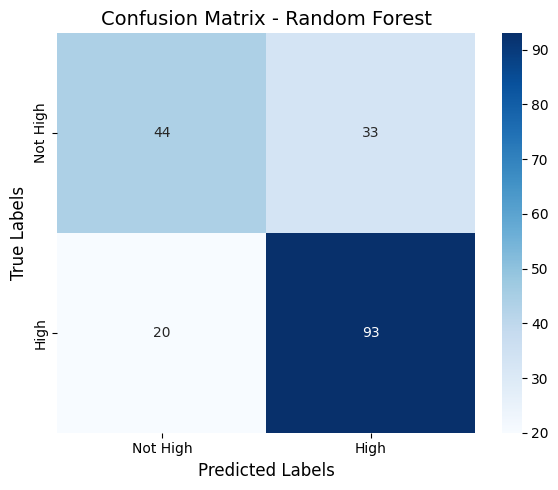

In [156]:
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not High', 'High'], yticklabels=['Not High', 'High'])

# Add labels and title
plt.title('Confusion Matrix - Random Forest', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()